In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.io import loadmat
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
import os
from scipy.io import loadmat
from skimage.io import imread, imshow
import scipy.io
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [2]:
path = '/home/khamituly/Documents/Diploma work/big_datasets/patients'

In [15]:
target = '/home/khamituly/Desktop/Normal-000002-2009-10-28-OD.npy'

In [17]:
mat = scipy.io.loadmat(target)

ValueError: Unknown mat file type, version 32, 32

In [9]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'I2'])

In [10]:
temp = np.array(mat['I2'], dtype=np.uint16)


In [12]:
temp.shape

(204, 748)

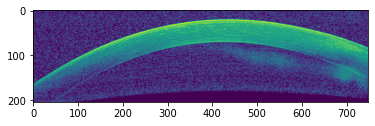

In [14]:
imgplot = plt.imshow(temp)

In [36]:
def print_mat_nested(d, indent=0, nkeys=0):
    """Pretty print nested structures from .mat files   
    Inspired by: `StackOverflow <http://stackoverflow.com/questions/3229419/pretty-printing-nested-dictionaries-in-python>`_
    """
    
    # Subset dictionary to limit keys to print.  Only works on first level
    if nkeys>0:
        d = {k: d[k] for k in d.keys()[:nkeys]}  # Dictionary comprehension: limit to first nkeys keys.

    if isinstance(d, dict):
        for key, value in d.iteritems():         # iteritems loops through key, value pairs
          print ('\t' * indent + 'Key: ' + str(key))
          print_mat_nested(value, indent+1)

    if isinstance(d,np.ndarray) and d.dtype.names is not None:  # Note: and short-circuits by default
        for n in d.dtype.names:    # This means it's a struct, it's bit of a kludge test.
            print('\t' * indent + 'Field: ' + str(n))
            print_mat_nested(d[n], indent+1)

print_mat_nested(mat, nkeys=78)

TypeError: 'dict_keys' object is not subscriptable